# UNSUPERVISED LEARNING PROJECT

In [2]:
import pandas as pd

data_houses = pd.read_csv ("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
data_houses.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
using_data = data_houses [["Latitude", "Longitude", "MedInc"]]
using_data.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split (using_data, test_size = 0.2, random_state = 7)

x_train.head()

,Latitude,Longitude,MedInc
17142,37.45,-122.18,4.4688
5460,34.00,-118.47,2.6042
7920,33.86,-118.07,3.4250
15846,37.75,-122.43,5.0519
18194,37.38,-122.02,3.2574


In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, random_state = 7)
model.fit (x_train)

KMeans(n_clusters=6, random_state=7)

In [8]:
y_train = list(model.labels_)
x_train["cluster"] = y_train
x_train.head()

,Latitude,Longitude,MedInc,cluster
17142,37.45,-122.18,4.4688,2
5460,34.00,-118.47,2.6042,1
7920,33.86,-118.07,3.4250,1
15846,37.75,-122.43,5.0519,2
18194,37.38,-122.02,3.2574,0


In [11]:
prediction = model.predict(x_test)

In [12]:
y_test = list (prediction)
x_test ["cluster"] = y_test
x_test.head()

,Latitude,Longitude,MedInc,cluster
4648,34.06,-118.31,2.0278,1
8740,33.81,-118.31,4.3056,4
162,37.81,-122.24,3.6750,0
15735,37.78,-122.43,2.6392,0
18380,37.21,-121.86,9.1974,2


### MODELO SUPERVISADO - DECISSION TREE

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier (random_state = 7)
tree_model.fit (x_train, y_train)

DecisionTreeClassifier(random_state=7)

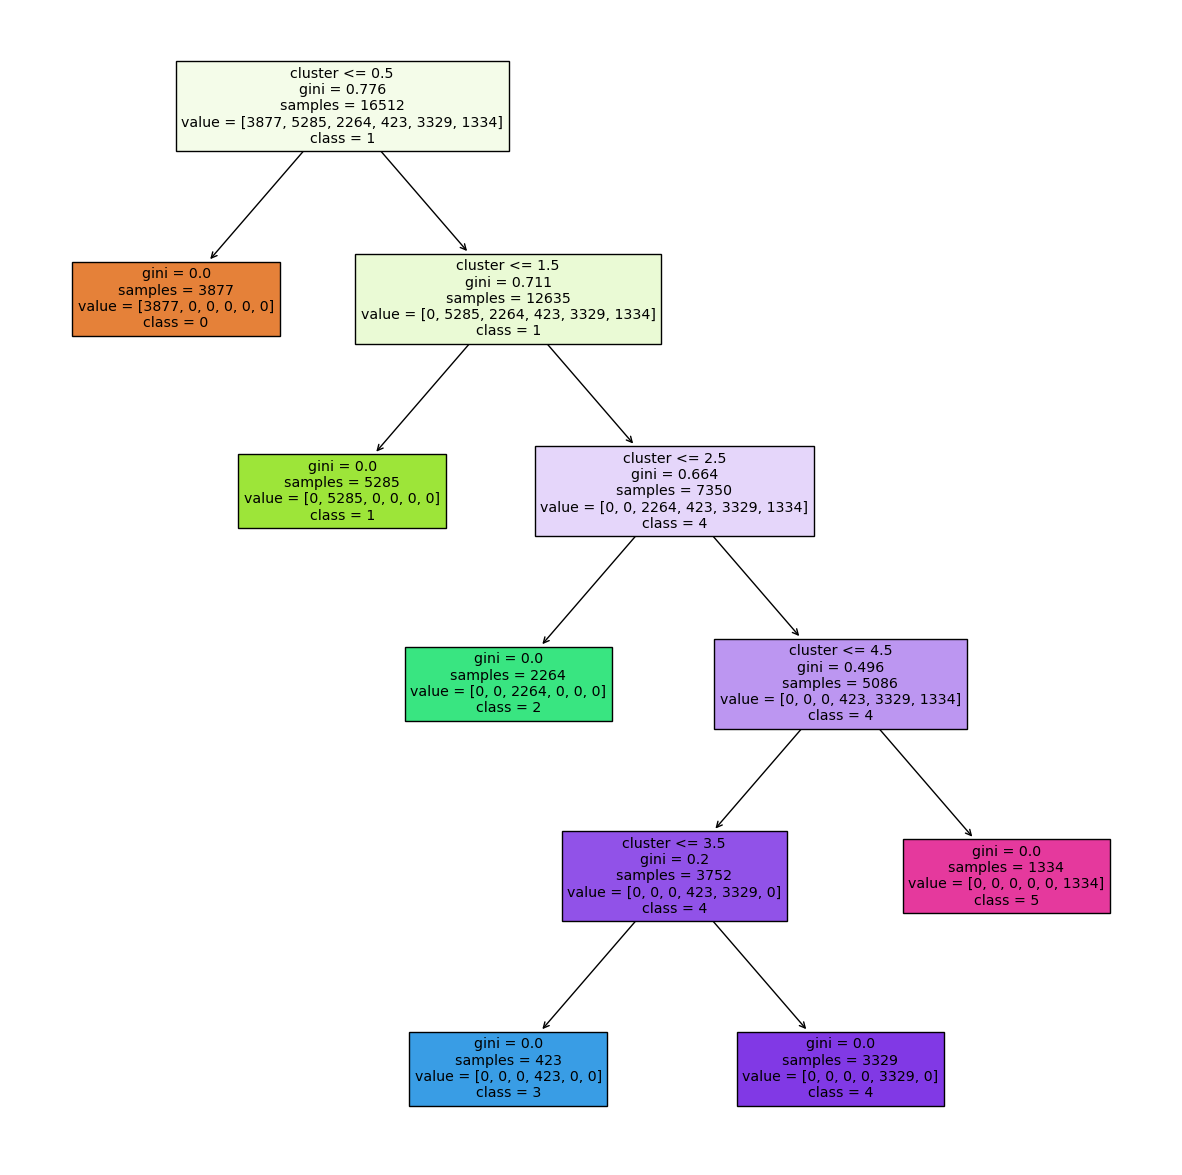

In [14]:
import matplotlib.pyplot as plt

from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(tree_model, feature_names = list(x_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [15]:
y_pred = tree_model.predict (x_test)
y_pred

array([1, 4, 0, ..., 0, 0, 3], dtype=int32)

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score (y_test, y_pred)

1.0

In [17]:
from pickle import dump

dump (model, open ("/workspaces/Unsupervised_Learning_LeryBenavides/models/k-means_default_7.sav", "wb"))
dump (tree_model, open ("/workspaces/Unsupervised_Learning_LeryBenavides/models/decision_tree_classifier_default_7.sav", "wb"))